In [1]:
from sklearn.datasets import make_blobs
import torch
from torch.utils.data import DataLoader, TensorDataset
import random
import math
from label_prop_arm import LabelProp
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
import utilities
import pandas as pd
import test_arm
import matplotlib.pyplot as plt

/home/users/lewinsda/.conda/envs/daniel_thesis_2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [68]:
datasets = []
for i in np.arange(.1,.5,.1):
    i = round(i, 5)
    file_path = "simulations/splat_" + str(i) + "_de/"
    temp_data = pd.read_csv(file_path + "counts.csv", index_col=0)
    temp_meta = pd.read_csv(file_path + "meta.csv", index_col=0)
    temp_X = np.array(temp_data)
    temp_y = pd.factorize(temp_meta['Group'], sort=True)[0]
    datasets.append((temp_X, temp_y))
    

In [84]:
maskings = [.6,.7,.8, .9,.95,.99]
arm = LabelProp("configs/semi_basic_linear.txt", 5)
results = test_arm.test_label_prop(datasets, maskings, arm, epochs=150)

In [85]:
results = np.array(results, dtype=object)

In [86]:
results

array([[[0.6, 0.8299999833106995, array([[402,  13,  13,   3],
                                         [ 32, 174,  11,   6],
                                         [ 31,  16, 169,   3],
                                         [ 24,   9,   9,  85]])],
        [0.7, 0.7609999775886536, array([[361,  41,  11,  18],
                                         [ 33, 176,   5,   9],
                                         [ 27,  25, 137,  30],
                                         [ 21,  10,   9,  87]])],
        [0.8, 0.7009999752044678, array([[363,  23,  29,  16],
                                         [ 58, 135,  20,  10],
                                         [ 36,  29, 135,  19],
                                         [ 34,  10,  15,  68]])],
        [0.9, 0.6000000238418579, array([[309,  38,  60,  24],
                                         [ 59, 108,  48,   8],
                                         [ 60,  22, 126,  11],
                                         [ 39,

In [34]:
results[0]

array([[0.8, 0.8769999742507935, array([[401,  19,   9,   2],
                                        [ 16, 204,   2,   1],
                                        [ 31,   2, 175,  11],
                                        [ 11,   8,  11,  97]])],
       [0.9, 0.8330000042915344, array([[367,  25,  30,   9],
                                        [ 12, 198,  12,   1],
                                        [ 12,  19, 185,   3],
                                        [ 30,  10,   4,  83]])]],
      dtype=object)

In [72]:
np.repeat(list(range(len(results))), len(results[0]))

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3])

In [87]:
results_df = pd.DataFrame({"dataset":np.repeat(list(range(len(results))), len(results[0])),"masking":results[:,:,0].flatten(), "accuracy":results[:,:,1].flatten()})
results_df["dataset"] = results_df["dataset"].astype("string")

In [88]:
results_df

,dataset,masking,accuracy
0,0,0.6,0.83
1,0,0.7,0.761
2,0,0.8,0.701
3,0,0.9,0.6
4,0,0.95,0.479
5,0,0.99,0.239
6,1,0.6,0.918
7,1,0.7,0.884
8,1,0.8,0.832
9,1,0.9,0.714


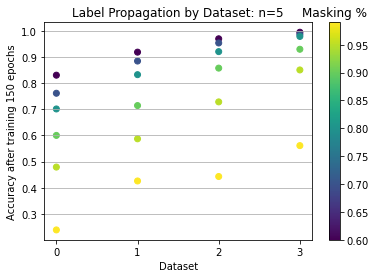

In [91]:
plt.scatter(results_df['dataset'], results_df['accuracy'], c=results_df['masking'], cmap=plt.cm.viridis)
plt.xlabel("Dataset")
plt.ylabel("Accuracy after training 150 epochs")
clb = plt.colorbar()
clb.ax.set_title('Masking %')
plt.title("Label Propagation by Dataset: n=5")
plt.grid(axis="y")
plt.savefig("n=5.pdf", format="pdf")